In [15]:
import ROOT
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
import numpy as np

In [28]:
#Prepare training data
inputs = []
outputs = []

training_inputs = []
training_outputs = []

testing_inputs = []
testing_outputs = []

fileName = "TrainingData/training1_sampled.csv"
with open(fileName, "r") as ins:
    for line in ins:
        linelist = line.split(",")[0:-1]
        floats = map(float, linelist)
        inputs.append(floats)
        outputs.append(float(line.split(",")[-1]))

nevents = len(outputs)


for i in xrange(0,int(nevents*0.7)):
    training_inputs.append(inputs[i])
    training_outputs.append(outputs[i])

for i in xrange(int(nevents*0.7),nevents-1):
    testing_inputs.append(inputs[i])
    testing_outputs.append(outputs[i])
    
for i in xrange(7):
    training_inputs += training_inputs
    training_outputs += training_outputs
print len(training_inputs)

34304


In [8]:
model = Sequential()
model.add(Dense(60,input_dim=15,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(60,kernel_initializer='random_uniform',activation = 'relu'))
model.add(Dense(60,kernel_initializer='random_uniform',activation = 'relu'))
model.add(Dense(60,kernel_initializer='random_uniform',activation = 'relu'))
model.add(Dense(1,kernel_initializer='random_uniform',activation = 'relu'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
cppath = "/afs/cern.ch/user/f/fdietric/CMSSW_8_0_26/src/DeepDiTau/TrainingCheckpoints/weights_epoch{epoch:02d}.hdf5"
cb = ModelCheckpoint(cppath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [29]:
model.fit(training_inputs,training_outputs, batch_size=2048, epochs = 100, verbose=1, callbacks=[cb])

Epoch 1/100
34304/34304 [==============================] - 4s - loss: 549.5805     
Epoch 2/100
34304/34304 [==============================] - 4s - loss: 545.9859     
Epoch 3/100
34304/34304 [==============================] - 4s - loss: 541.9879     
Epoch 4/100
18432/34304 [===============>..............] - ETA: 2s - loss: 538.6888

KeyboardInterrupt: 

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: deltam (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: deltam (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).


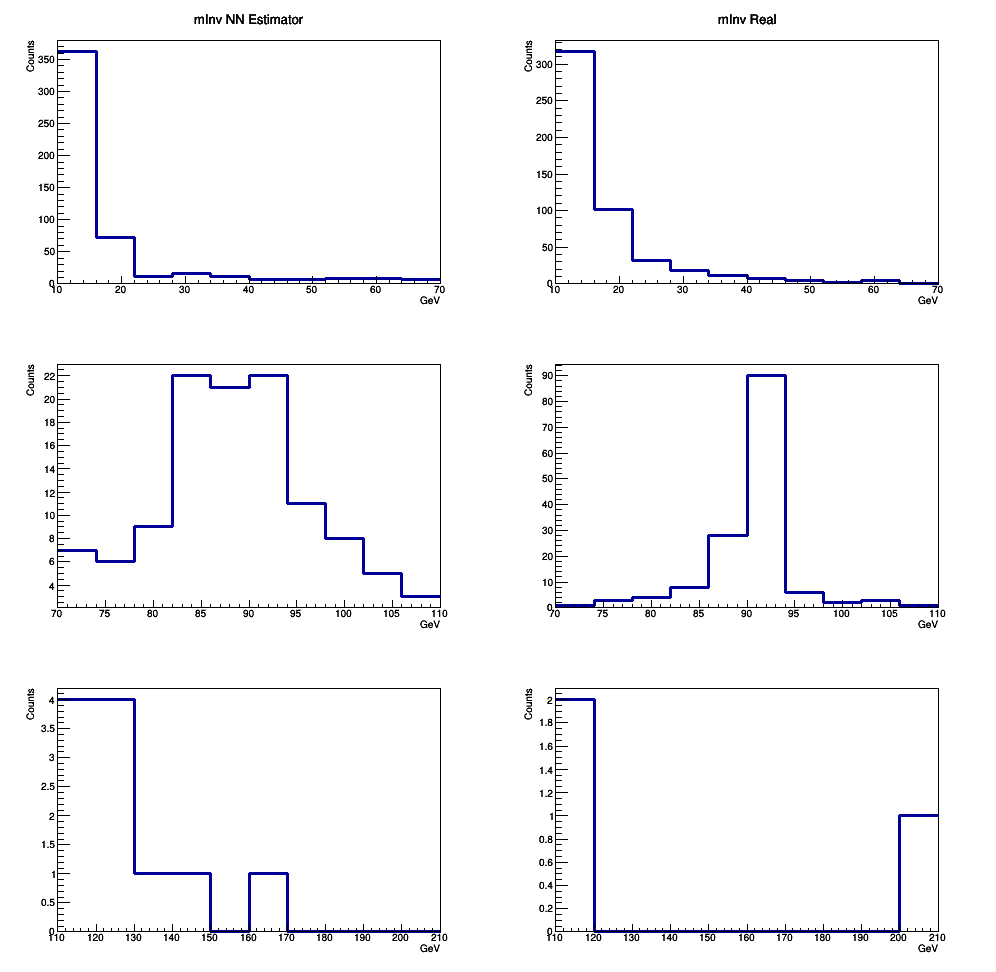

Info in <TCanvas::Print>: png file /afs/cern.ch/user/f/fdietric/public/deepditau/plots/NNestimator3.png has been created


In [132]:
i=100
x=np.asarray(testing_inputs[i]).reshape((1,15))
arr = model.predict(testing_inputs)
dm = []
for i in xrange(len(arr)):
    dm.append((float(arr[i])-outputs[i])/outputs[i])
    
bins = 10
start = 10
end = 70
c1 = ROOT.TCanvas("","", 0,0,1000,1000)
c1.Divide(2,3)
                  

c1.cd(1)
h1 = ROOT.TH1D("h1","mInv NN Estimator",bins,start,end)
for d in arr:
    h1.Fill(d)
h1.SetStats(False)
h1.GetYaxis().SetTitle("Counts")
h1.GetXaxis().SetTitle("GeV")
h1.Draw()
c1.cd(2)
h2 = ROOT.TH1D("h1","mInv Real",bins,start,end)
for d in testing_outputs:
    h2.Fill(d)
h2.Draw()
h2.GetYaxis().SetTitle("Counts")
h2.GetXaxis().SetTitle("GeV")
h2.SetStats(False)
c1.cd(3)
h3 = ROOT.TH1D("deltam","",bins,start+60,end+40)
for d in arr:
    h3.Fill(d)
h3.GetXaxis().SetTitle("GeV")
h3.SetStats(False)
h3.GetYaxis().SetTitle("Counts")
h3.Draw()

c1.cd(4)
h4 = ROOT.TH1D("h1","",bins,start+60,end+40)
for d in testing_outputs:
    h4.Fill(d)
h4.Draw()
h4.GetYaxis().SetTitle("Counts")
h4.GetXaxis().SetTitle("GeV")
h4.SetStats(False)

c1.cd(5)
h5 = ROOT.TH1D("deltam","",bins,start+100,end+140)
for d in arr:
    h5.Fill(d)
h5.GetXaxis().SetTitle("GeV")
h5.SetStats(False)
h5.GetYaxis().SetTitle("Counts")
h5.Draw()

c1.cd(6)
h6 = ROOT.TH1D("h1","",bins,start+100,end+140)
for d in testing_outputs:
    h6.Fill(d)
h6.Draw()
h6.GetYaxis().SetTitle("Counts")
h6.GetXaxis().SetTitle("GeV")
h6.SetStats(False)

c1.Draw()
c1.SaveAs("/afs/cern.ch/user/f/fdietric/public/deepditau/plots/NNestimator3.png")

In [10]:
model.save("test_model_2.h5")

In [3]:
model=load_model("test_model_2.h5")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h1 (Potential memory leak).


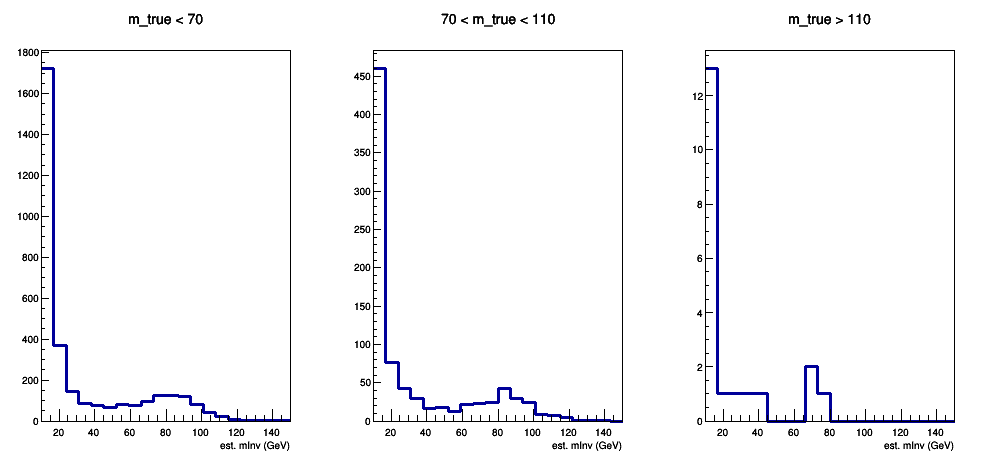

In [24]:
arr = model.predict(testing_inputs)
c1 = ROOT.TCanvas("","", 0,0,1000,500)
vals = []
c1.Divide(3,1)
c1.cd(1)
for i in xrange(len(arr)):
    vals.append((arr[i], outputs[i]))
h1 = ROOT.TH1D("h1","m_true < 70",20,10,150)
h1.SetStats(False)
h1.GetXaxis().SetTitle("est. mInv (GeV)")
for m in vals:
    if m[1] < 70:
        h1.Fill(m[0])
h1.Draw()

c1.cd(2)
h2 = ROOT.TH1D("h1","70 < m_true < 110",20,10,150)
for m in vals:
    if m[1] > 70 and m[1] < 110:
        h2.Fill(m[0])
h2.Draw()
h2.GetXaxis().SetTitle("est. mInv (GeV)")
h2.SetStats(False)

c1.cd(3)
h3 = ROOT.TH1D("h1","m_true > 110",20,10,150)
for m in vals:
    if m[1] > 110:
        h3.Fill(m[0])
h3.Draw()
h3.GetXaxis().SetTitle("est. mInv (GeV)")
h3.SetStats(False)

c1.Draw()
#c1.SaveAs("/afs/cern.ch/user/f/fdietric/public/deepditau/plots/NNestimator3.png")

In [25]:
#c1.SaveAs("/afs/cern.ch/user/f/fdietric/public/deepditau/plots/NNestimator3_602h.png")

Info in <TCanvas::Print>: png file /afs/cern.ch/user/f/fdietric/public/deepditau/plots/NNestimator3_602h.png has been created


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: h2 (Potential memory leak).


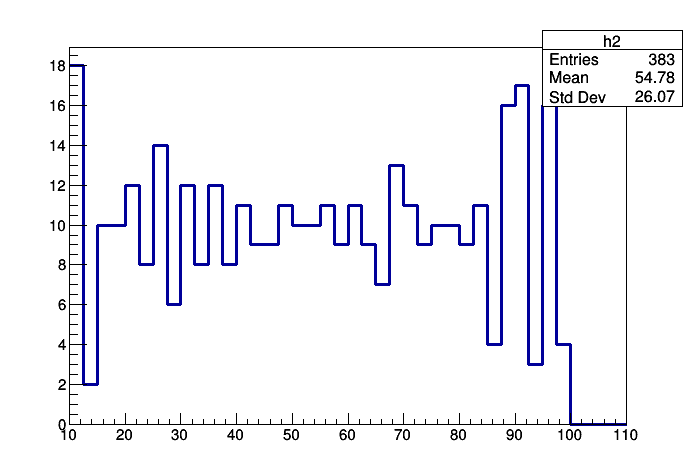

In [6]:
c1 = ROOT.TCanvas()
h1 = ROOT.TH1D("h2","",40,10,110)
for m in outputs:
    h1.Fill(m)
h1.Draw()
c1.Draw()